In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame for easier manipulation
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map target integers to actual species names for clarity
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


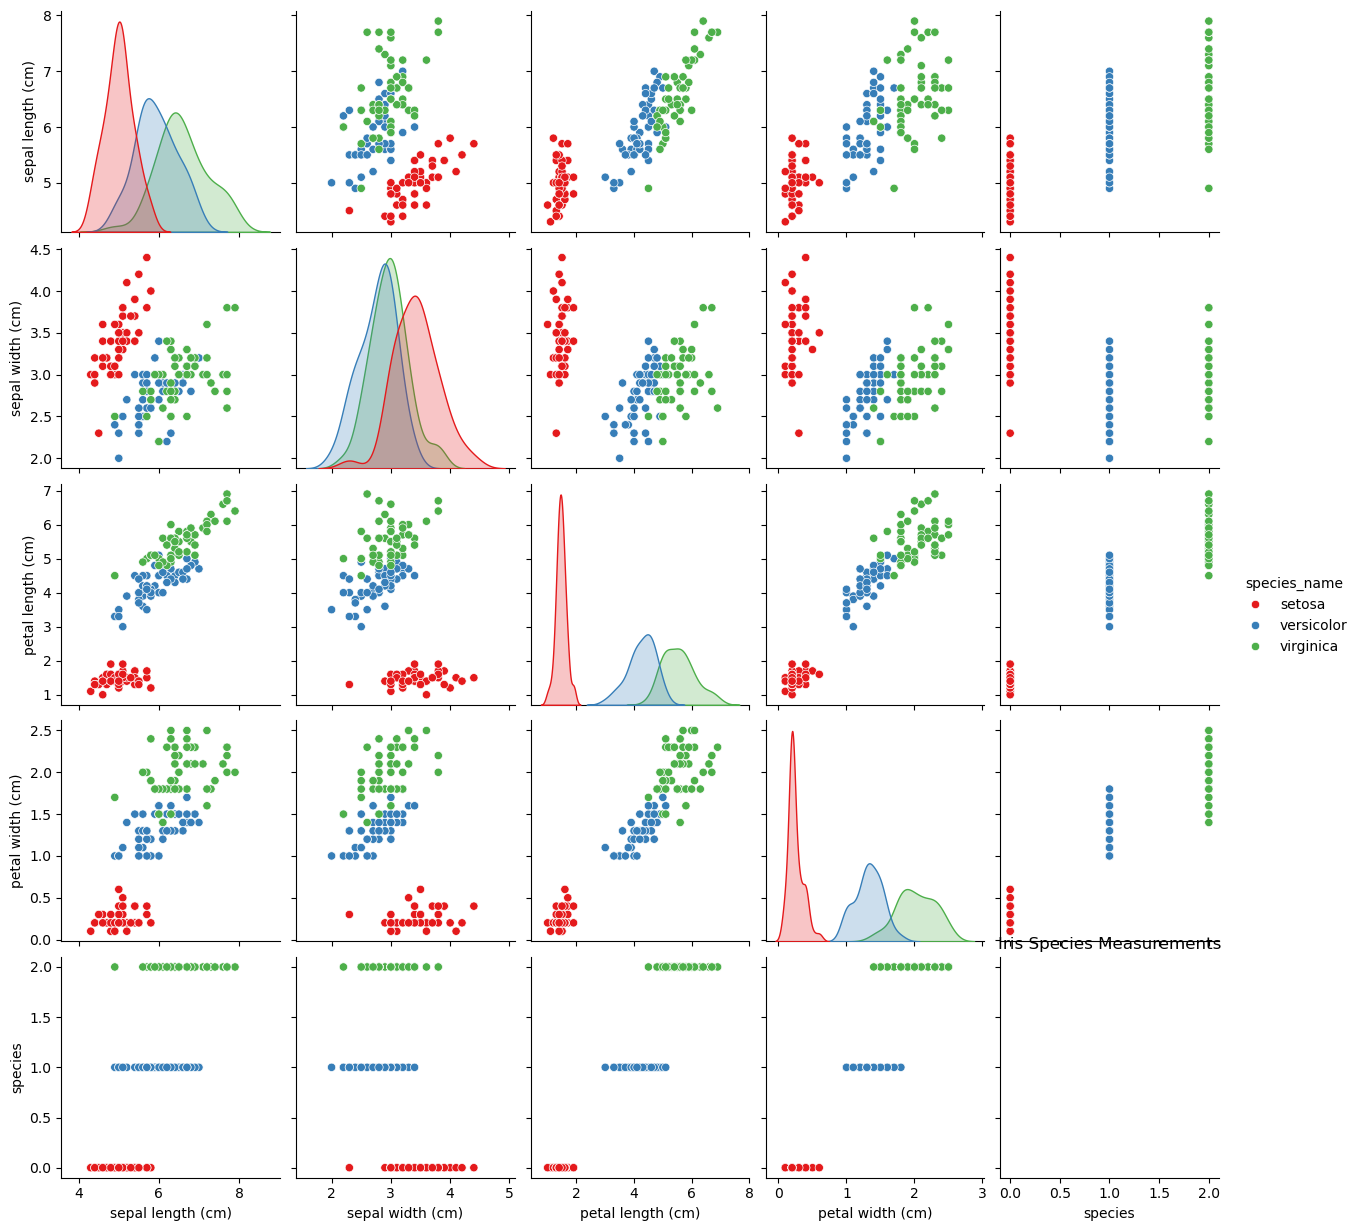

In [2]:
# Visualize the data relationships
sns.pairplot(df, hue='species_name', palette='Set1')
plt.title("Iris Species Measurements")
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = iris.data
y = iris.target

# Split the data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Training shape: (120, 4)
Testing shape: (30, 4)


In [4]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model (k=3 is a common starting point)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


Model Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:


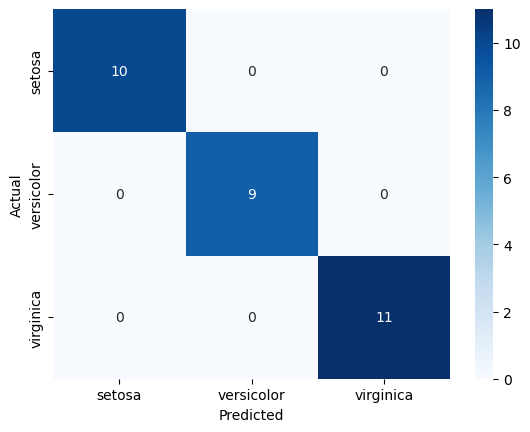

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion Matrix
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [6]:
# Example: [sepal length, sepal width, petal length, petal width]
new_measurement = np.array([[5.1, 3.5, 1.4, 0.2]])

prediction = knn.predict(new_measurement)
species_name = iris.target_names[prediction][0]

print(f"For measurements {new_measurement}, the predicted species is: {species_name}")

For measurements [[5.1 3.5 1.4 0.2]], the predicted species is: setosa
